In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/food recongnization system/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 3115 files belonging to 36 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/food recongnization system/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 332 files belonging to 36 classes.


building a model

In [5]:
cnn = tf.keras.models.Sequential()

building convoultion layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters = 64,kernel_size =3,activation = 'relu',input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size= 2,strides = 2)) # max pooling

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters = 64,kernel_size =3,activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size= 2,strides = 2)) # max pooling and 2 layers to avoid data loss

In [8]:
# avoid overfitting

cnn.add(tf.keras.layers.Dropout(0.5))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128,activation = 'relu'))## to make neuron here units means no. of neurons

In [11]:
cnn.add(tf.keras.layers.Dense(units=36,activation = 'softmax'))## as there are 36 classes so keep them output 36 neurons

Compiling phase and training phase

In [12]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = ['accuracy'])
  #if two category or two value then use binary_crossentropy or categorical and optimizer is adam also

In [38]:
train_history = cnn.fit(x=training_set,validation_data = validation_set,epochs = 15)

Epoch 1/15
98/98 [==============================] - 125s 1s/step - loss: 0.8895 - accuracy: 0.8934 - val_loss: 1.9578 - val_accuracy: 0.8946
Epoch 2/15
98/98 [==============================] - 117s 1s/step - loss: 0.7932 - accuracy: 0.8982 - val_loss: 1.3394 - val_accuracy: 0.9127
Epoch 3/15
98/98 [==============================] - 116s 1s/step - loss: 1.2405 - accuracy: 0.8716 - val_loss: 2.5442 - val_accuracy: 0.8705
Epoch 4/15
98/98 [==============================] - 117s 1s/step - loss: 1.0950 - accuracy: 0.8909 - val_loss: 1.1342 - val_accuracy: 0.9428
Epoch 5/15
98/98 [==============================] - 115s 1s/step - loss: 1.1633 - accuracy: 0.8831 - val_loss: 1.4390 - val_accuracy: 0.9518
Epoch 6/15
98/98 [==============================] - 125s 1s/step - loss: 0.8480 - accuracy: 0.8854 - val_loss: 1.4658 - val_accuracy: 0.9518
Epoch 7/15
98/98 [==============================] - 117s 1s/step - loss: 0.6466 - accuracy: 0.9095 - val_loss: 1.2445 - val_accuracy: 0.9428
Epoch 8/15
98

In [39]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
train_history.history #return history dictionary

{'loss': [0.8895040154457092,
  0.7932361960411072,
  1.2404580116271973,
  1.0950323343276978,
  1.1632604598999023,
  0.848016083240509,
  0.6466083526611328,
  0.8027079701423645,
  0.7971624135971069,
  0.8620094656944275,
  0.8714840412139893,
  0.9560244083404541,
  0.7938860058784485,
  0.972547709941864,
  0.8731352686882019],
 'accuracy': [0.8934189677238464,
  0.8982343673706055,
  0.8715890645980835,
  0.8908507227897644,
  0.8831460475921631,
  0.8853932619094849,
  0.9094703197479248,
  0.8966292142868042,
  0.9046549201011658,
  0.9097913503646851,
  0.9001604914665222,
  0.9008025527000427,
  0.9017656445503235,
  0.8995184302330017,
  0.9069020748138428],
 'val_loss': [1.9578392505645752,
  1.3393584489822388,
  2.544220209121704,
  1.1341956853866577,
  1.4389941692352295,
  1.4658467769622803,
  1.2445236444473267,
  1.4609687328338623,
  3.2851150035858154,
  2.3831300735473633,
  3.428701639175415,
  1.4663723707199097,
  2.4021615982055664,
  4.206696510314941,
  1

In [41]:
import json
with open('training_hist.json','w') as f:
    json.dump(train_history.history,f)

In [42]:
print(train_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Calculate final accuracy of model

In [43]:
print("validation set accuracy :{} %".format(train_history.history['val_accuracy'][-1]*100))

validation set accuracy :94.27710771560669 %


accuracy visulation

Text(0, 0.5, 'accuracy')

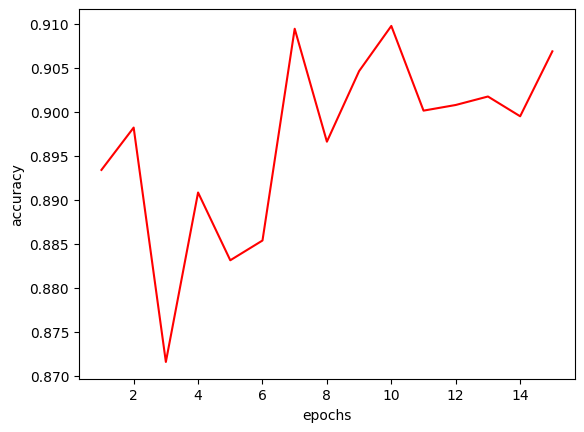

In [47]:
#training visuation
epochs = [i for i in range(1,16)]
plt.plot(epochs,train_history.history['accuracy'],color='red')
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'validation accuracy')

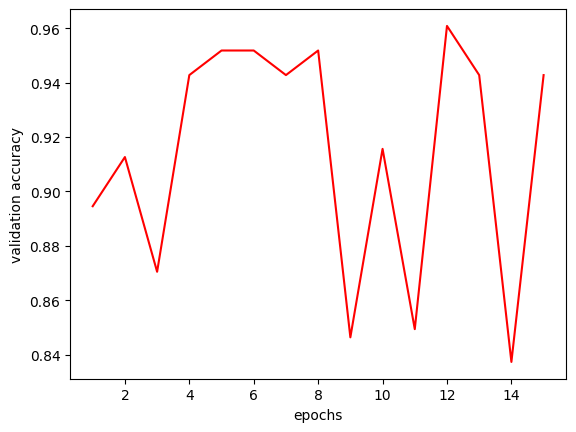

In [48]:
epochs = [i for i in range(1,16)]
plt.plot(epochs,train_history.history['val_accuracy'],color='red')
plt.xlabel('epochs')
plt.ylabel('validation accuracy')